In [1]:
import pandas as pd
import matplotlib

In [2]:
# Historical Sales and Active Inventory

data = pd.read_csv('HistoricalSalesandActive Inventory.csv')
print(data.info())

print(data['date'].max())
print(data['date'].min())

print(data['store'].unique())
print(data['item'].unique())

print(data.head())

#filtering use all store, all item/sku and 3 years date
data = data[(data['date'] >= '2015-01-01') & (data['date'] < '2018-01-01')]
data = data[(data['item'] >0) & (data['item']< 10)]
data = data[data['store'] == 1]
print(data.head())
print(len(data))

#data.to_csv('HistoricalSalesandActive Inventory_3years_no_header.csv', header=False, index=False)
#data.to_csv('HistoricalSalesandActive Inventory_3years_.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None
2017-12-31
2013-01-01
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
           date  store  item  sales
730  2015-01-01      1     1     11
731  2015-01-02      1     1     19
732  2015-01-03      1     1     16
733  2015-01-04      1     1     14
734  2015-01-05     

In [5]:
## separated dataset into subset for item 1 to 10
data1 = data[data['item'] == 1]
data2 = data[data['item'] == 2]
data3 = data[data['item'] == 3]

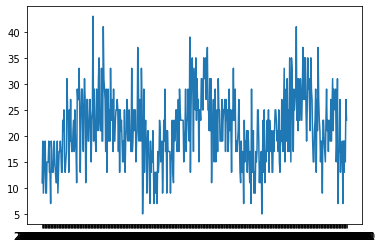

<Figure size 576x144 with 0 Axes>

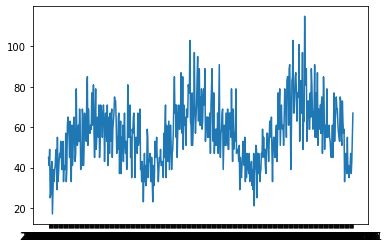

<Figure size 576x144 with 0 Axes>

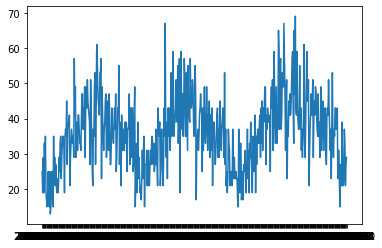

<Figure size 576x144 with 0 Axes>

In [8]:
#Visualize demand sales 
import matplotlib.pyplot as plt
%matplotlib inline

def plot_ts_cluster(dataframe, item, store):
    filter_data = dataframe[ (dataframe['store'] == store) & (dataframe['item'] == item) & (dataframe['sales'])] 
    # filter_data = filter_data[(filter_data['date'] > '2017-01-01') & (filter_data['date'] < '2017-01-31')]
    x = filter_data['date'] 
    y = filter_data['sales']  
    plt.plot(x, y)
    plt.figure(figsize=(8, 2))
    plt.show()

plot_ts_cluster(data1,1,1)
plot_ts_cluster(data2,2,1)
plot_ts_cluster(data3,3,1)


In [3]:
print(data['date'].max())
print(data['date'].min())
## split training for 2,5 years and testing 6 months
data_training = data[(data['date'] >= '2015-01-01') & (data['date'] < '2017-07-01')]
data_testing = data[(data['date'] >= '2017-07-01') & (data['date'] < '2018-01-01')]

print('Training Date')
print(data_training['date'].min())
print(data_training['date'].max())
print('Testing Date')
print(data_testing['date'].min())
print(data_testing['date'].max())

2017-12-31
2015-01-01
Training Date
2015-01-01
2017-06-30
Testing Date
2017-07-01
2017-12-31


In [11]:
def split_data_train_test(data,cluster):
    data_training = data[(data['date'] >= '2015-01-01') & (data['date'] < '2017-07-01')]
    data_testing = data[(data['date'] >= '2017-07-01') & (data['date'] < '2018-01-01')]

    data_training.to_csv('cluster/subset_'+str(cluster)+'_3years_training_no_header.csv', header=False, index=False)
    data_testing.to_csv('cluster/subset_'+str(cluster)+'_3years_testing_no_header.csv', header=False, index=False)
    return data_training,data_testing

In [12]:
data_1_train, data_1_test = split_data_train_test(data1,1)
data_2_train, data_2_test = split_data_train_test(data2,2)
data_3_train, data_3_test = split_data_train_test(data3,3)

In [4]:
# data_training.to_csv('HistoricalSalesandActive Inventory_3years_training_no_header.csv', header=False, index=False)
# data_training.to_csv('HistoricalSalesandActive Inventory_3years_training_.csv', header=False, index=False)

# data_testing.to_csv('HistoricalSalesandActive Inventory_3years_testing_no_header.csv', header=False, index=False)
# data_testing.to_csv('HistoricalSalesandActive Inventory_3years_testing_.csv', header=False, index=False)